In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor

In [63]:
# Load data
with open('Time.txt', 'r') as f:
    time_data = f.readlines()

with open('CF_Denmark.txt', 'r') as f:
    cf_data = f.readlines()

# Convert time data to datetime objects
time_data = [datetime.datetime.strptime(x.strip(), '%Y-%m-%dT%H:%M:%SZ') for x in time_data]

# Convert cf data to float values
cf_data = [float(x.strip()) for x in cf_data]

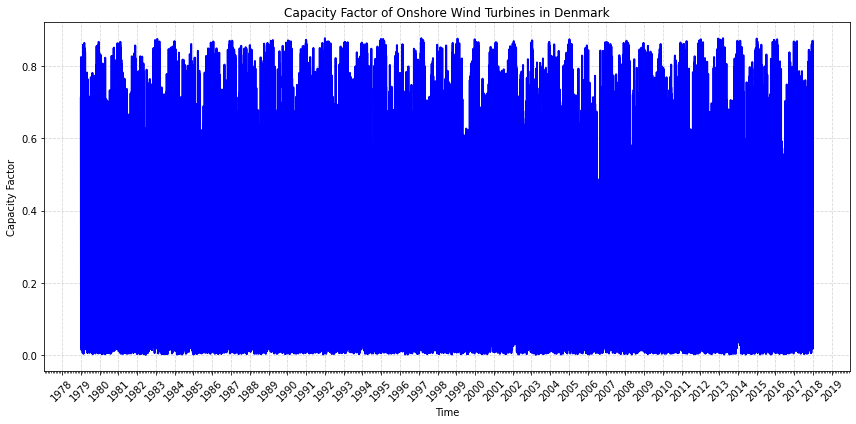

In [64]:
# Plot Capacity Factor (CF)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time_data, cf_data, color='blue', linewidth=2)
ax.set_title('Capacity Factor of Onshore Wind Turbines in Denmark')
ax.set_xlabel('Time')
ax.set_ylabel('Capacity Factor')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [65]:
# Maximum CF value
maximum_cf = np.max(cf_data)
print("Maximum Capacity Factor:", maximum_cf)

Maximum Capacity Factor: 0.877


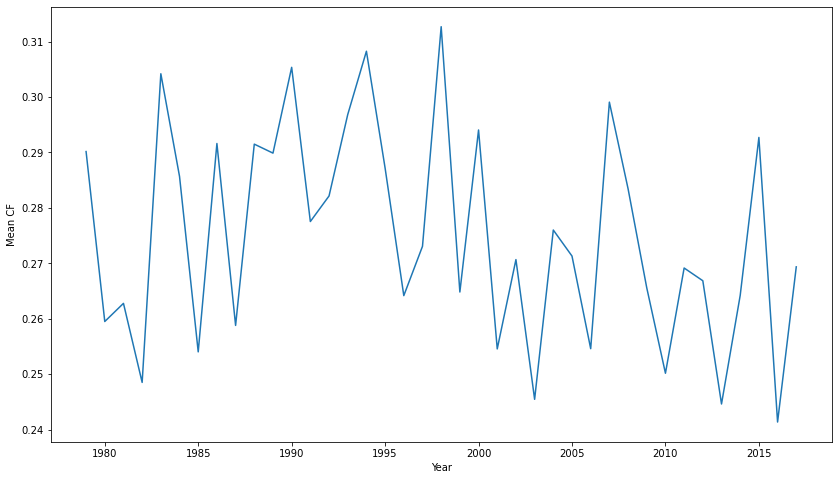

In [66]:
# Create plot for yearly average
df = pd.DataFrame({'time': time_data, 'cf': cf_data})
yearly_data = df.groupby(df.time.dt.year)['cf'].mean()

fig1, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(yearly_data.index, yearly_data.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean CF')
plt.show()

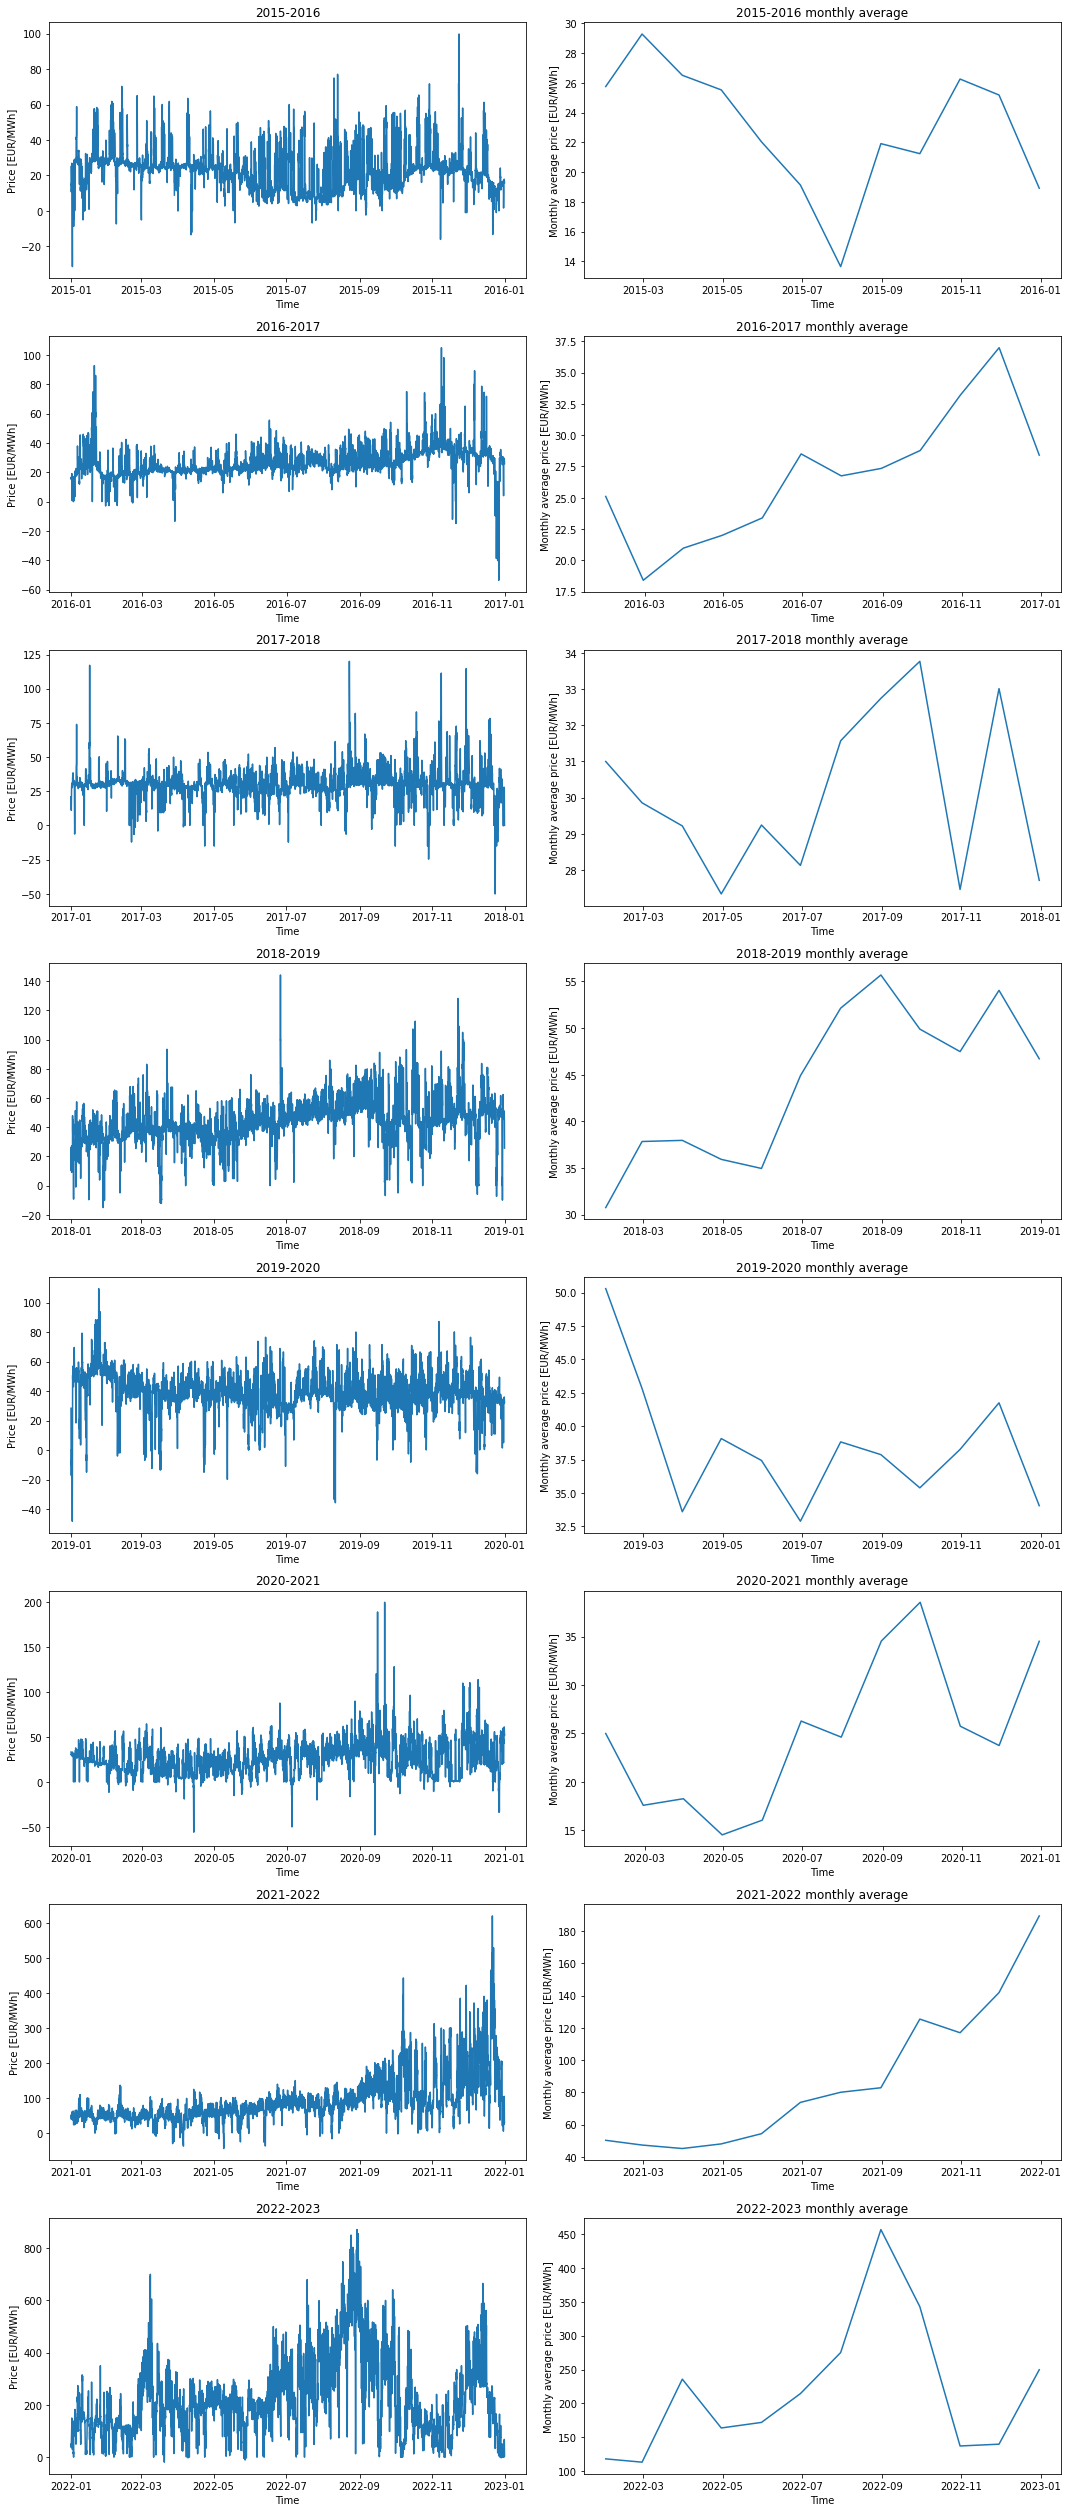

In [67]:
# Electicity Prices for DK1 yearly 

filenames = ['Day-ahead Prices_201501010000-201601010000.csv', 'Day-ahead Prices_201601010000-201701010000.csv', 'Day-ahead Prices_201701010000-201801010000.csv', 'Day-ahead Prices_201801010000-201901010000.csv', 'Day-ahead Prices_201901010000-202001010000.csv', 'Day-ahead Prices_202001010000-202101010000.csv', 'Day-ahead Prices_202101010000-202201010000.csv', 'Day-ahead Prices_202201010000-202301010000.csv']
titles    = ['2015-2016', '2016-2017', '2017-2018','2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
fig, axs  = plt.subplots(8, 2, figsize=(15,35))

for i, (filename, title) in enumerate(zip(filenames, titles)):
    df = pd.read_csv(filename, delimiter=',')
    df['MTU (CET/CEST)'] = df['MTU (CET/CEST)'].apply(lambda x: x.split(' - ')[0])
    df['Day-ahead Price [EUR/MWh]'] = df['Day-ahead Price [EUR/MWh]'].astype(float)
    df['MTU (CET/CEST)'] = pd.to_datetime(df['MTU (CET/CEST)'], format='%d.%m.%Y %H:%M')

    axs[i, 0].plot(df['MTU (CET/CEST)'], df['Day-ahead Price [EUR/MWh]'])
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Price [EUR/MWh]')
    axs[i, 0].set_title(title)

    # Plot monthly average data
    df_monthly = df.groupby(pd.Grouper(key='MTU (CET/CEST)', freq='M'))['Day-ahead Price [EUR/MWh]'].mean()
    axs[i, 1].plot(df_monthly.index, df_monthly.values)
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('Monthly average price [EUR/MWh]')
    axs[i, 1].set_title(title + ' monthly average')

plt.tight_layout()
plt.show()

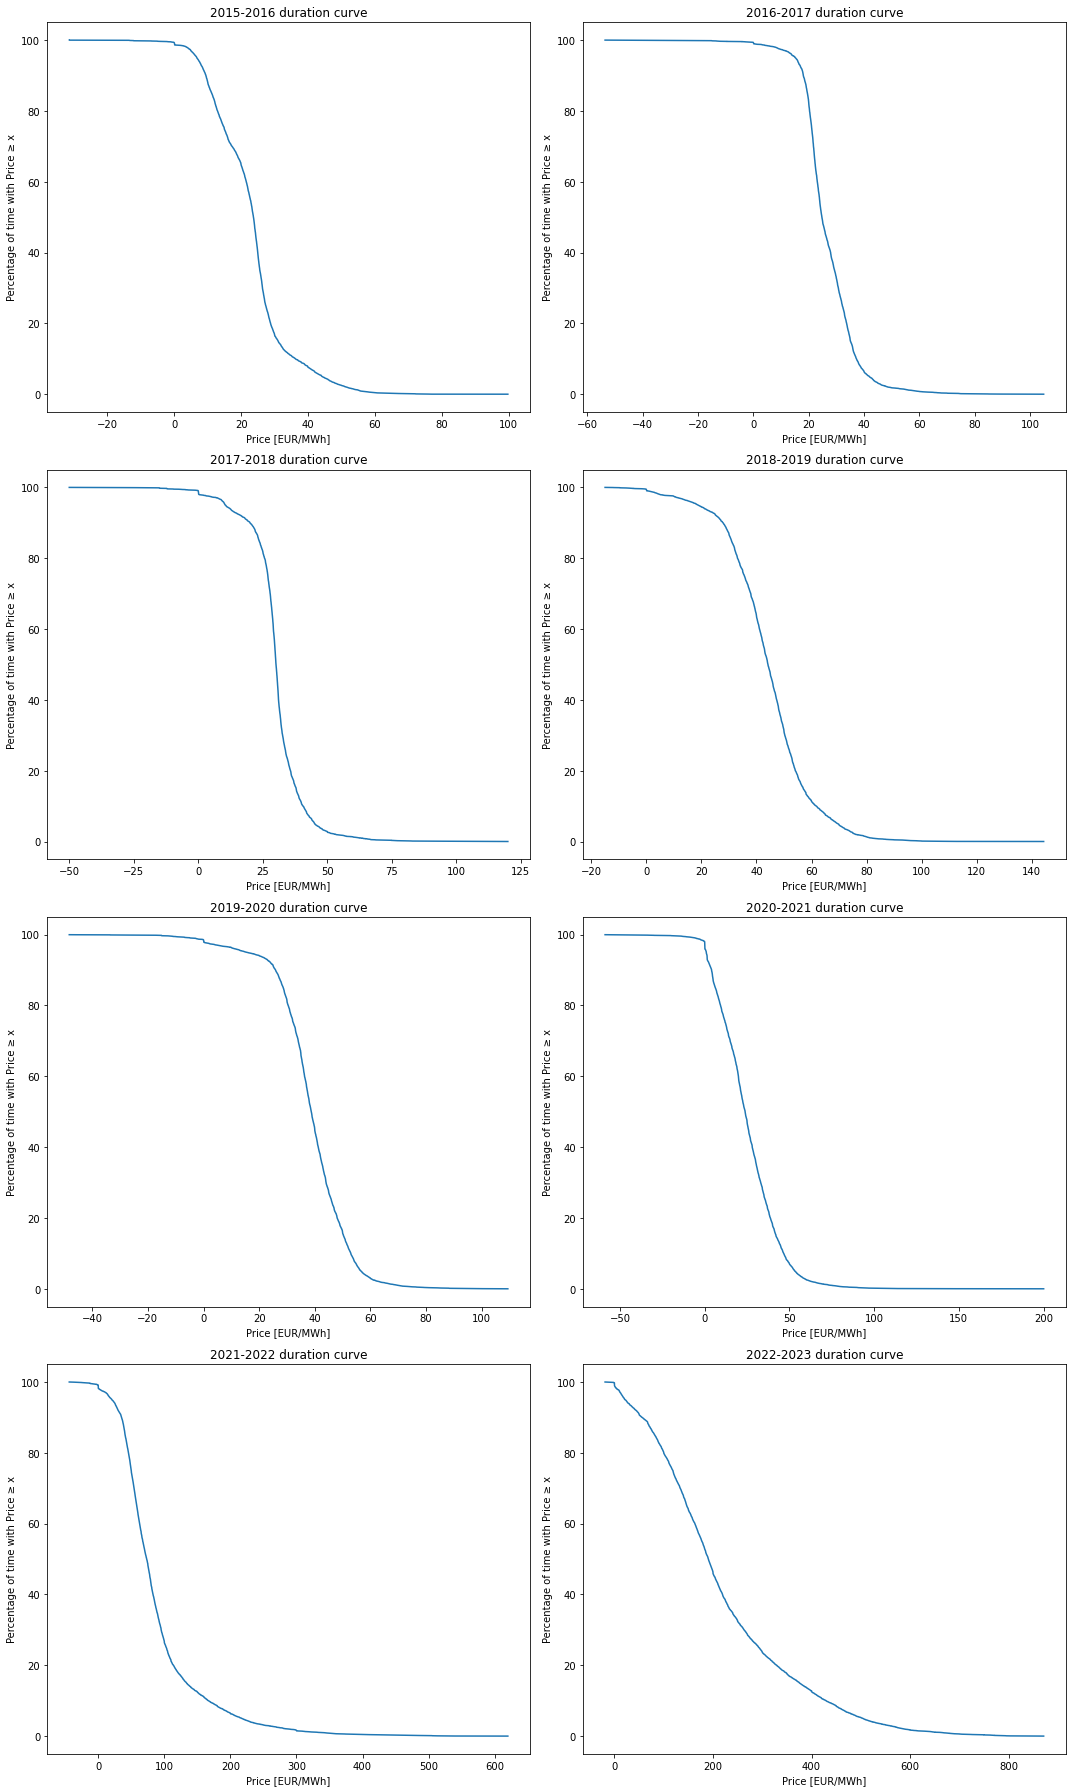

In [68]:
# Plot duration yearly curves for price
filenames = ['Day-ahead Prices_201501010000-201601010000.csv', 'Day-ahead Prices_201601010000-201701010000.csv', 'Day-ahead Prices_201701010000-201801010000.csv', 'Day-ahead Prices_201801010000-201901010000.csv', 'Day-ahead Prices_201901010000-202001010000.csv', 'Day-ahead Prices_202001010000-202101010000.csv', 'Day-ahead Prices_202101010000-202201010000.csv', 'Day-ahead Prices_202201010000-202301010000.csv']
titles    = ['2015-2016', '2016-2017', '2017-2018','2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
fig, axs  = plt.subplots(4, 2, figsize=(15,25))

for i, (filename, title) in enumerate(zip(filenames, titles)):
    df = pd.read_csv(filename, delimiter=',')
    df['MTU (CET/CEST)'] = df['MTU (CET/CEST)'].apply(lambda x: x.split(' - ')[0])
    df['Day-ahead Price [EUR/MWh]'] = df['Day-ahead Price [EUR/MWh]'].astype(float)
    df['MTU (CET/CEST)'] = pd.to_datetime(df['MTU (CET/CEST)'], format='%d.%m.%Y %H:%M')
    sorted_prices = df['Day-ahead Price [EUR/MWh]'].sort_values()
    cumulative_percentages = 100 * (1 - sorted_prices.rank(method='first') / len(sorted_prices))

    axs.flat[i].plot(sorted_prices, cumulative_percentages)
    axs.flat[i].set_xlabel('Price [EUR/MWh]')
    axs.flat[i].set_ylabel('Percentage of time with Price ≥ x')
    axs.flat[i].set_title(title + ' duration curve')

plt.tight_layout()
plt.show()

In [69]:
# Define new time index upload the data for CF and Price
start_date = '2000-01-01 00:00:00'
end_date   = '2017-12-31 12:00:00'
time_index = pd.date_range(start=start_date, end=end_date, freq='H')

with open('CF_2000_2017.txt', 'r') as f:
    CF    = np.array(f.read().splitlines(), dtype=float)[:157789]
with open('price_2000_2017.txt', 'r') as f:
    Price = np.array(f.read().splitlines(), dtype=float)

Price     = np.flip(Price)

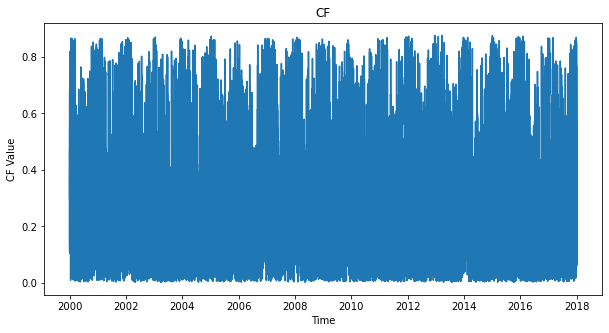

In [70]:
# Plot CF 
plt.figure(figsize=(10, 5))
plt.plot(time_index, CF)
plt.title('CF')
plt.xlabel('Time')
plt.ylabel('CF Value')
plt.show()

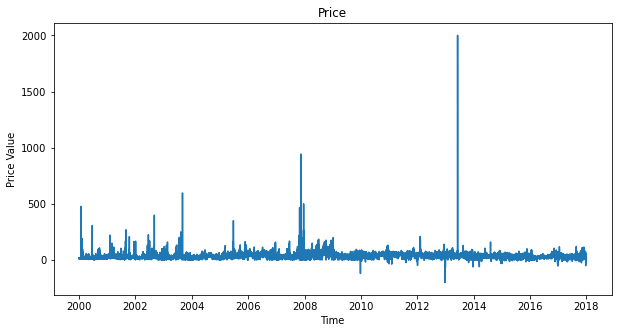

In [71]:
# Plot Price
plt.figure(figsize=(10, 5))
plt.plot(time_index, Price)
plt.title('Price')
plt.xlabel('Time')
plt.ylabel('Price Value')
plt.show()

In [72]:
# Mean of the Price
np.mean(Price)

34.136774176171976

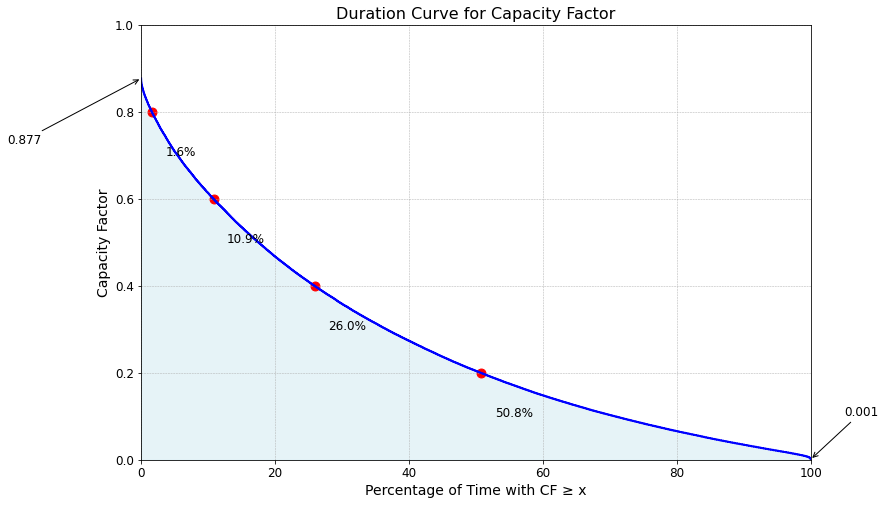

In [73]:
# Duration Curver for CF
sorted_CF  = sorted(CF, reverse=False)
percentage = 100 * (1 - np.arange(1, len(sorted_CF) + 1) / (len(sorted_CF) + 1)) 

plt.figure(figsize=(12, 8))
plt.plot(percentage, sorted_CF, color='blue', linewidth=2)
plt.title('Duration Curve for Capacity Factor', fontsize=16)
plt.xlabel('Percentage of Time with CF ≥ x', fontsize=14)
plt.ylabel('Capacity Factor', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.fill_between(percentage, sorted_CF, color='lightblue', alpha=0.3)

# Add dots and annotations
plt.annotate(f'{sorted_CF[0]:.3f}', xy=(percentage[0], sorted_CF[0]), xytext=(percentage[0]+5, sorted_CF[0]+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.annotate(f'{sorted_CF[-1]:.3f}', xy=(percentage[-1], sorted_CF[-1]), xytext=(percentage[-1]-20, sorted_CF[-1]-0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

cf_values = [0.8, 0.6, 0.4, 0.2]
for cf in cf_values:
    index = next(i for i, val in enumerate(sorted_CF) if val >= cf)
    plt.scatter(percentage[index], sorted_CF[index], color='red', s=80)
    plt.annotate(f'{percentage[index]:.1f}%', xy=(percentage[index], sorted_CF[index]), xytext=(percentage[index] + 2, sorted_CF[index] - 0.1), fontsize=12)

plt.show()

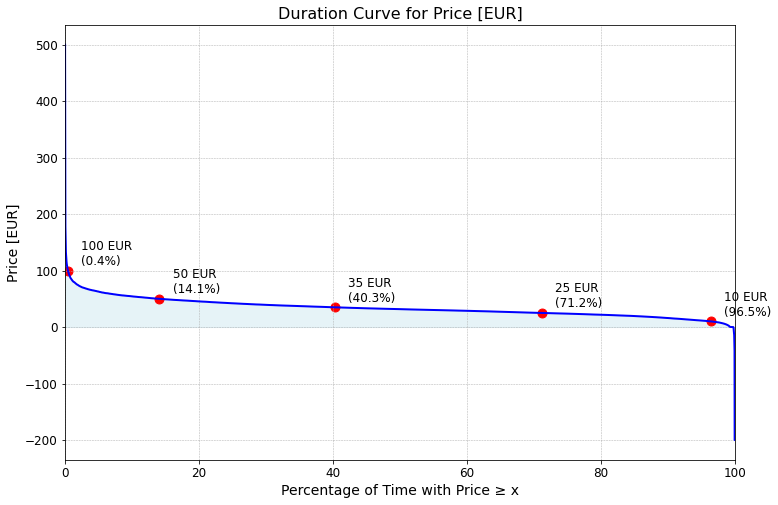

In [74]:
# Duration curve for Price
# Filter data for prices lower than or equal to 1000
filtered_price = [p for p in Price if p <= 500]
sorted_price   = sorted(filtered_price, reverse=False)
percentage_p   = 100 * (1 - np.arange(1, len(sorted_price) + 1) / (len(sorted_price) + 1))


plt.figure(figsize=(12, 8))
plt.plot(percentage_p, sorted_price, color='blue', linewidth=2)
plt.title('Duration Curve for Price [EUR]', fontsize=16)
plt.xlabel('Percentage of Time with Price ≥ x', fontsize=14)
plt.ylabel('Price [EUR]', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0, 100])
plt.fill_between(percentage_p, sorted_price, color='lightblue', alpha=0.3)

# Add dots and annotations if there are filtered prices
if filtered_price:
    price_values = [100, 50, 35, 25, 10]
    for price in price_values:
        index = next((i for i, val in enumerate(sorted_price) if val >= price), None)
        if index is not None:
            plt.scatter(percentage_p[index], sorted_price[index], color='red', s=80)
            plt.annotate(f'{price} EUR\n({percentage_p[index]:.1f}%)',
                         xy=(percentage_p[index], sorted_price[index]),
                         xytext=(percentage_p[index] + 2, sorted_price[index] + 5),
                         fontsize=12, verticalalignment='bottom')
else:
    plt.text(50, 500, 'No prices below 1000 EUR', fontsize=14, ha='center')

plt.show()

In [75]:
num_below_zero = sum(Price < 0 for Price in Price)
print(f"The number of price values below 0: {num_below_zero}")

The number of price values below 0: 364


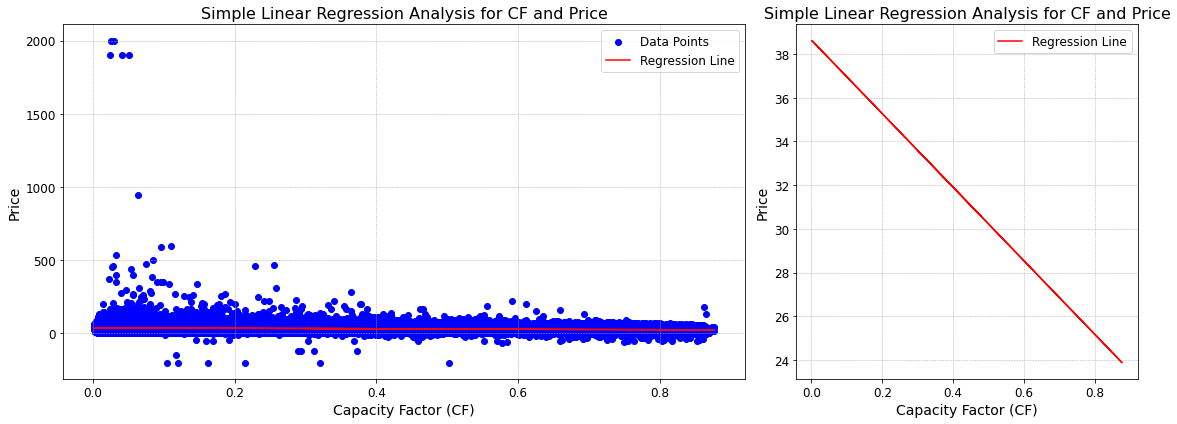

In [76]:
# Simple regression for CF and Price
CF = CF.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(CF, Price)
slope    = regression_model.coef_[0]
regression_line = regression_model.predict(CF)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(CF, Price, color='b', label='Data Points')
axs[0].plot(CF, regression_model.predict(CF), color='r', label='Regression Line')
axs[0].set_xlabel('Capacity Factor (CF)', fontsize=14)
axs[0].set_ylabel('Price', fontsize=14)
axs[0].set_title('Simple Linear Regression Analysis for CF and Price', fontsize=16)
axs[0].legend(fontsize=12)
axs[0].grid(True, linestyle='--', linewidth=0.5)
axs[0].tick_params(labelsize=12)

axs[1].plot(CF, regression_line, color='r', label='Regression Line')
axs[1].set_xlabel('Capacity Factor (CF)', fontsize=14)
axs[1].set_ylabel('Price', fontsize=14)
axs[1].set_title('Simple Linear Regression Analysis for CF and Price', fontsize=16)
axs[1].legend(fontsize=12)
axs[1].grid(True, linestyle='--', linewidth=0.5)
axs[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

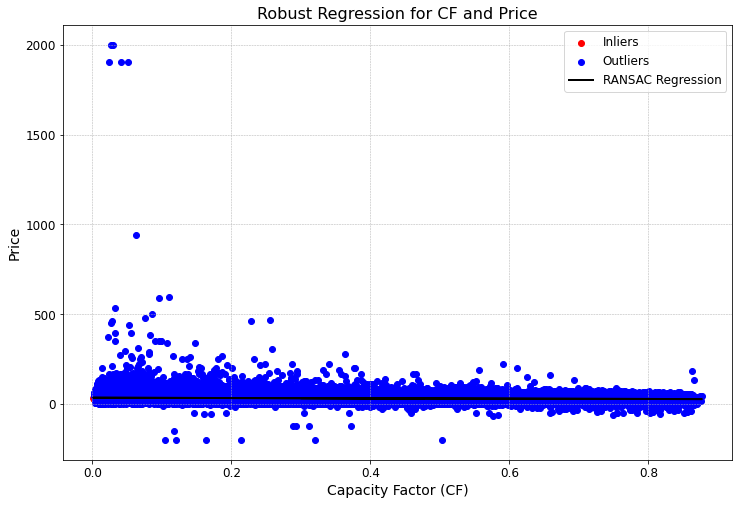

In [77]:
# Robust Regression for CF and Price
CF = CF.flatten()
ransac_cf = RANSACRegressor()
ransac_cf.fit(CF.reshape(-1, 1), Price)

# Obtain the inliers and outliers from RANSAC regressor
inlier_mask = ransac_cf.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(12, 8))
plt.scatter(CF[inlier_mask], Price[inlier_mask], color='red', label='Inliers')
plt.scatter(CF[outlier_mask], Price[outlier_mask], color='blue', label='Outliers')
plt.plot(CF, ransac_cf.predict(CF.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
plt.title('Robust Regression for CF and Price', fontsize=16)
plt.xlabel('Capacity Factor (CF)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

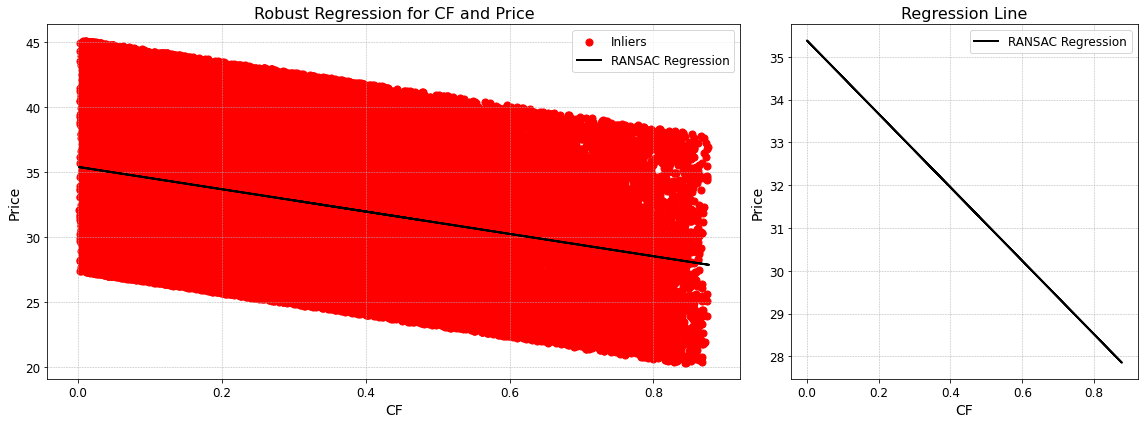

In [78]:
# Robust regression just for the inliers and regression line
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

ax1.scatter(CF[inlier_mask], Price[inlier_mask], color='red', label='Inliers', s=50)
ax1.plot(CF, ransac_cf.predict(CF.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
ax1.set_title('Robust Regression for CF and Price', fontsize=16)
ax1.set_xlabel('CF', fontsize=14)
ax1.set_ylabel('Price', fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.tick_params(axis='both', labelsize=12)

ax2.plot(CF, ransac_cf.predict(CF.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
ax2.set_title('Regression Line', fontsize=16)
ax2.set_xlabel('CF', fontsize=14)
ax2.set_ylabel('Price', fontsize=14)
ax2.legend(fontsize=12)
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()